## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

/tmp/ipykernel_9055/3876407214.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_missing_data = df.groupby(pd.Grouper(key=date_column, freq='M')).apply(lambda x: (x.isnull().sum().sum() / x.size) * 100)
/tmp/ipykernel_9055/3876407214.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_missing_data = df.groupby(pd.Grouper(key=date_column, freq='M')).apply(lambda x: (x.isnull().sum().sum() / x.size) * 100)


Missing Data Rate per Month:
      date  missing_percentage
2023-01-31                 0.0
2023-02-28                25.0
2023-03-31                 0.0
2023-04-30                12.5
2023-05-31                 0.0
2023-06-30                12.5


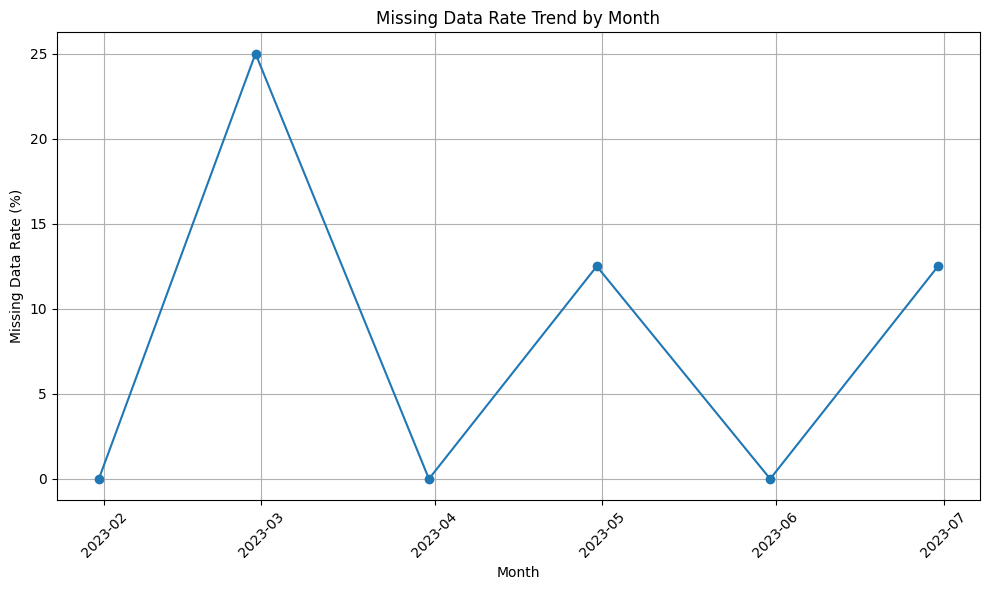

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def analyze_missing_data_trend(csv_file, date_column='date'):
    """
    Analyzes the trend of missing data in a CSV file over time, specifically by month.

    Args:
        csv_file (str): Path to the CSV file.
        date_column (str, optional): Name of the date column. Defaults to 'date'.

    Returns:
        pandas.DataFrame: A DataFrame with the missing data percentages per month,
                          or None if an error occurs.  The DataFrame has columns:
                            - month:  The month (as a datetime object)
                            - missing_percentage: The percentage of missing values for that month
        matplotlib.figure.Figure: The matplotlib figure object.

    """
    try:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file}")
        return None, None
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None, None

    # Check if the date column exists
    if date_column not in df.columns:
        print(f"Error: Date column '{date_column}' not found in the file.")
        return None, None

    # Convert the date column to datetime objects, handling errors
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Drop rows where date conversion failed
    df = df.dropna(subset=[date_column])

    # Group data by month and calculate the percentage of missing values for each month
    monthly_missing_data = df.groupby(pd.Grouper(key=date_column, freq='M')).apply(lambda x: (x.isnull().sum().sum() / x.size) * 100)
    monthly_missing_data = monthly_missing_data.reset_index(name='missing_percentage')

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Added figsize
    ax.plot(monthly_missing_data[date_column], monthly_missing_data['missing_percentage'], marker='o', linestyle='-')

    # Format the date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.xlabel('Month')
    plt.ylabel('Missing Data Rate (%)')
    plt.title('Missing Data Rate Trend by Month')
    plt.grid(True)  # Add grid lines
    plt.tight_layout()  # Adjust layout

    return monthly_missing_data, fig



def main():
    """
    Main function to run the missing data trend analysis and display the plot.
    """
    # Provide the path to your CSV file
    csv_file = 'sales_data.csv'  # Replace with your actual file path

    # Create a dummy CSV file for demonstration
    try:
        with open(csv_file, 'w') as f:
            f.write("date,product_id,sales_amount,customer_id\n2023-01-15,101,100.0,1\n2023-01-20,102,150.0,2\n2023-02-10,103,,3\n2023-02-25,104,200.0,\n2023-03-05,105,250.0,5\n2023-03-15,106,300.0,1\n2023-04-01,107,120.0,2\n2023-04-20,,180.0,4\n2023-05-10,109,220.0,3\n2023-05-28,110,270.0,5\n2023-06-05,111,130.0,\n2023-06-18,112,190.0,4")
    except FileExistsError:
        pass

    # Analyze missing data trend
    monthly_missing_data, fig = analyze_missing_data_trend(csv_file)

    # Display the results
    if monthly_missing_data is not None and fig is not None:
        print("Missing Data Rate per Month:")
        print(monthly_missing_data.to_string(index=False))
        plt.show()  # Show the plot
    else:
        print("Error occurred while analyzing missing data trend.")



if __name__ == "__main__":
    main()
